# Nglview advance usage

In [4]:
import nglview as nv
from ase.build import molecule

## Obtain the C60 structure from ASE

In [2]:
c60 = molecule("C60")
c60.set_cell([[20, 0, 0],[0, 20, 0],[0, 0, 20]])
c60.center()
c60.pbc=True

## Show the fullerene structure by Nglview

In [3]:
view = nv.show_ase(c60)
view.add_unitcell()
view

NGLWidget()

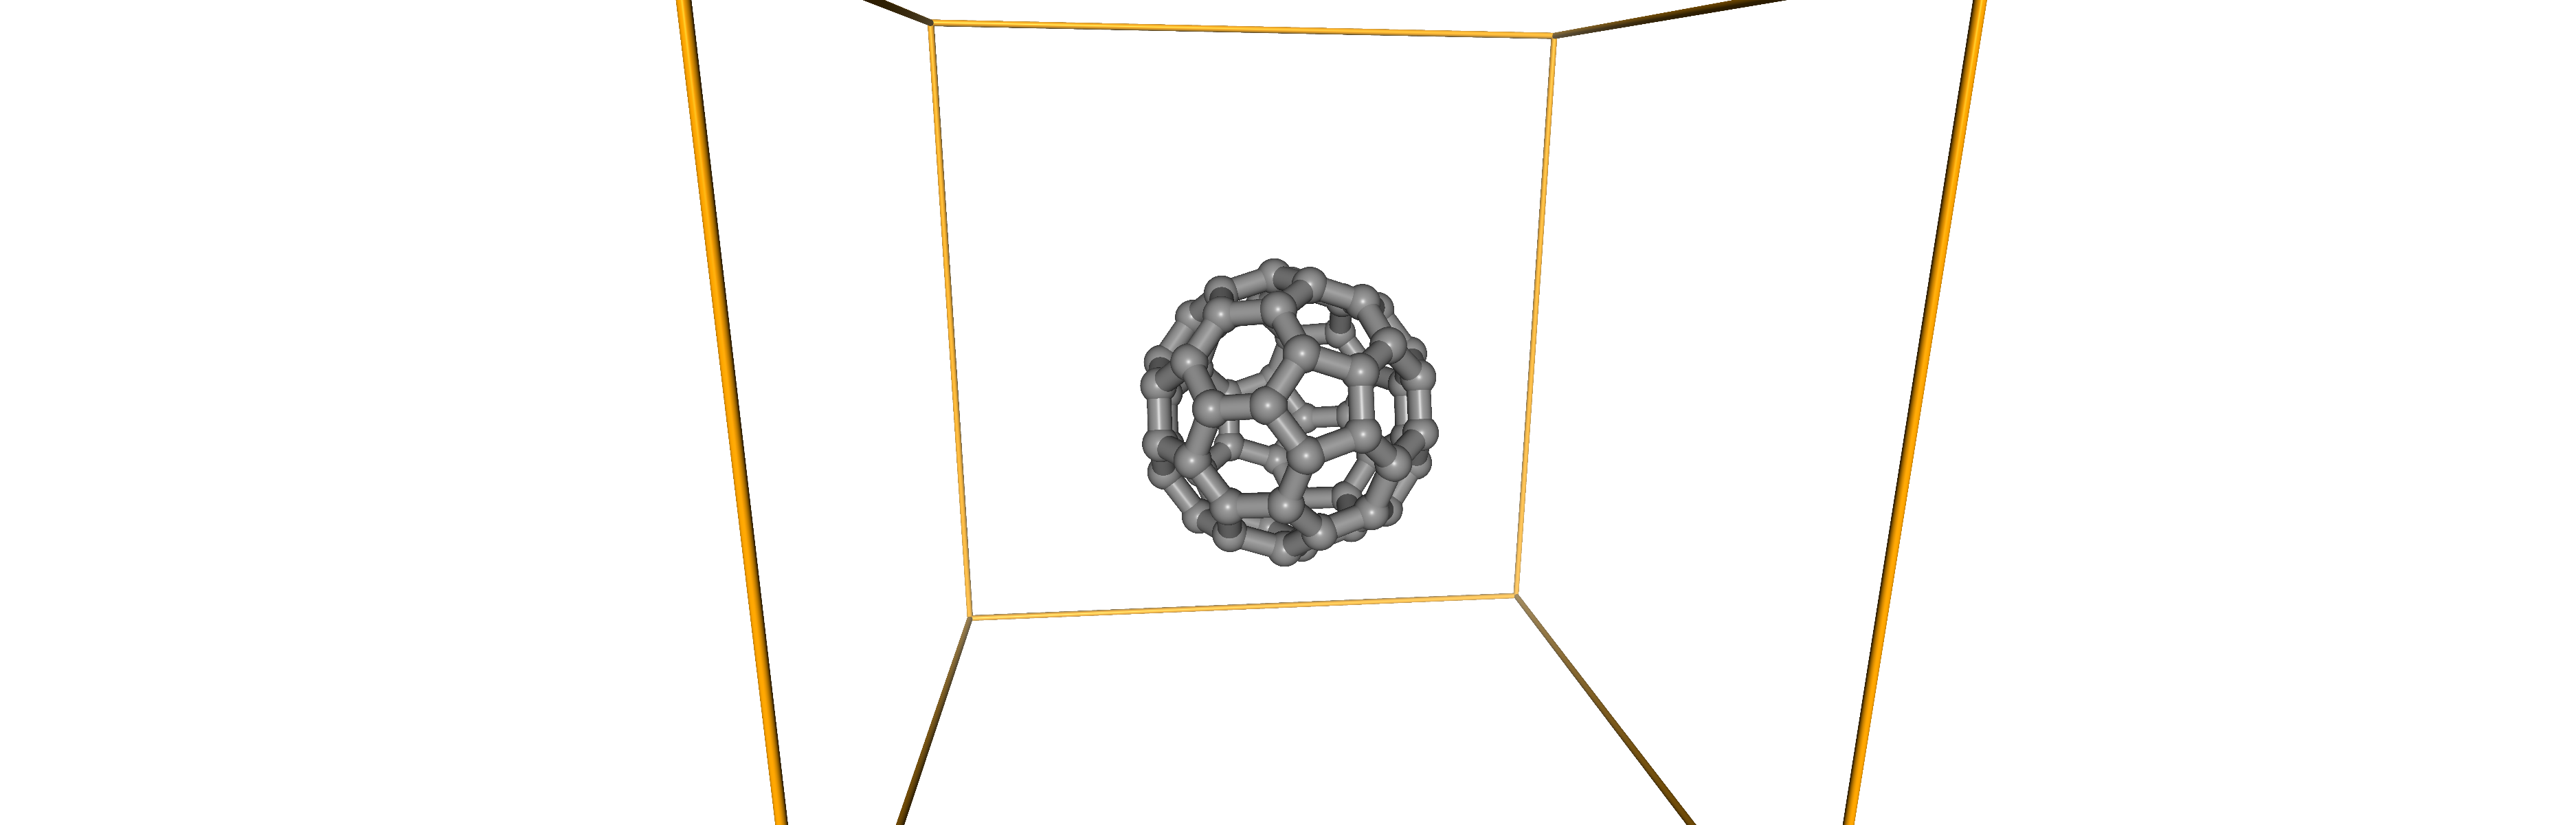

In [8]:
view.render_image()
view._display_image()

## Orientation

### Translation the fullerene by a vector [10, 0, 0]

In [59]:
view.control.translate([10, 0, 0])
view

NGLWidget(n_components=1)

### Zoom the structure by 1.5 

In [60]:
view.control.zoom(1.5)
view

NGLWidget(n_components=1)

## Plot isosurface

Here, I plot the CHGCAR from the VASP calculation of water molecule. 

In [9]:
from ase.io import read

aa = read("./H2O/CONTCAR");
view1 = nv.show_ase(aa);
view1.add_component('./H2O/CHGCAR.cube');
view1.clear()
view1.add_unitcell();
view1.component_0.add_surface(color='blue', isolevelType="value", isovalue=0.9)
view1

NGLWidget()

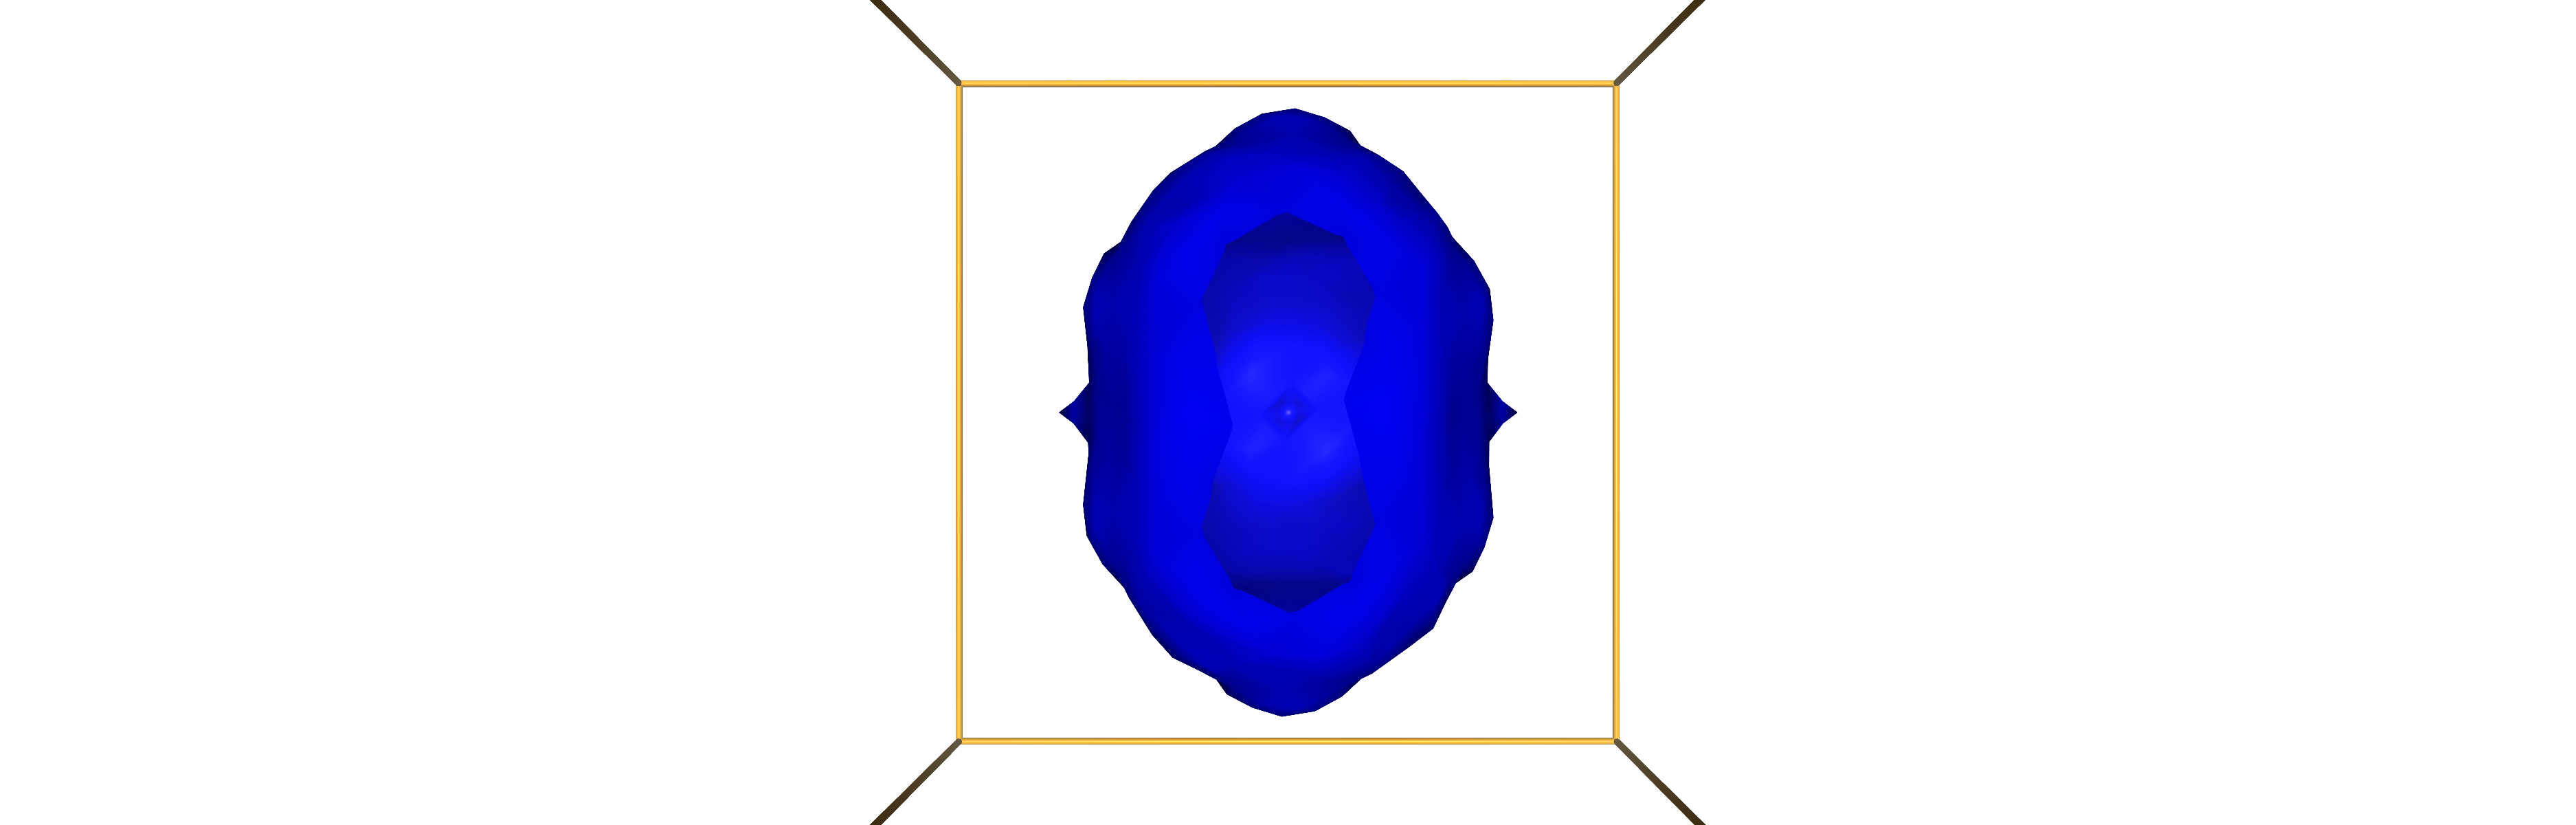

In [11]:
view1.render_image()
view1._display_image()

## Callback function in Nglview 

A callback function, which returns the picked atom number. 

In [12]:
from ipywidgets import Output, VBox

out = Output(layout={'border': '2px solid red'})

def on_picked_change(b):
    with out:
        try:
            print(b['new']['atom1']['index'])
        except:
            print()
        

view = nv.show_ase(c60)
view.observe(on_picked_change, 'picked')
display(VBox([view, out]))


This work has been done with the support of the EPFL Open Science found [OSSCAR](http://www.osscar.org).

<img src="./figures/OSSCAR_logo.png" style="height:40px; width: 200px"/>